In [109]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import random
import numpy as np
from scipy import stats

In [138]:
tiempo = 'Tiempo de ejecución (en nanosegundos)'
n = 'n'
m = 'm'
ns = 'ns'

blue='#4C72B0'
green='#55A868'
red='#C44E52'

# Implementación por fuerza bruta

In [220]:
dfExact = pd.read_csv('exact.csv')
dfExact = dfExact.groupby([n, m]).min().reset_index()
dfExactComplete = pd.read_csv('exact-complete.csv')
dfExactComplete = dfExactComplete.groupby([n, m]).min().reset_index()

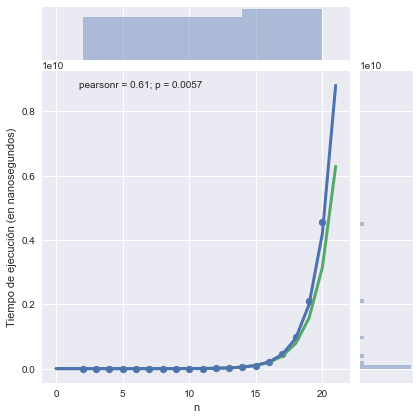

In [308]:
g = sns.jointplot(
    x=n, y=ns, data=dfExactComplete
)
g.set_axis_labels(xlabel=n, ylabel=tiempo)
g.ax_joint.set(xticks=[0,5,10,15,20])

nodos = range(0,22)
complejidad = [(200 * (n * 2 ** n) + 3000 * (n ** 2)) for n in nodos]
g.ax_joint.plot(nodos, complejidad, linewidth=3, color=blue, zorder=3)
complejidad = [(3000 * (2 ** n)) for n in nodos]
g.ax_joint.plot(nodos, complejidad, linewidth=3, color=green, zorder=2)

plt.show()

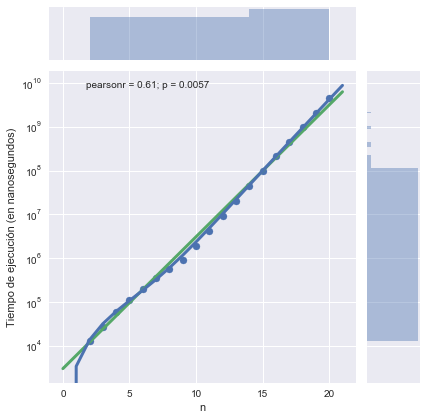

In [307]:
g = sns.jointplot(
    x=n, y=ns, data=dfExactComplete
)
g.set_axis_labels(xlabel=n, ylabel=tiempo)
g.ax_joint.set(xticks=[0,5,10,15,20])
g.ax_joint.set_yscale('log')

nodos = range(0,22)
complejidad = [(200 * (n * 2 ** n) + 3000 * (n ** 2)) for n in nodos]
g.ax_joint.plot(nodos, complejidad, linewidth=3, color=blue, zorder=3)
complejidad = [(3000 * (2 ** n)) for n in nodos]
g.ax_joint.plot(nodos, complejidad, linewidth=3, color=green, zorder=2)

plt.show()

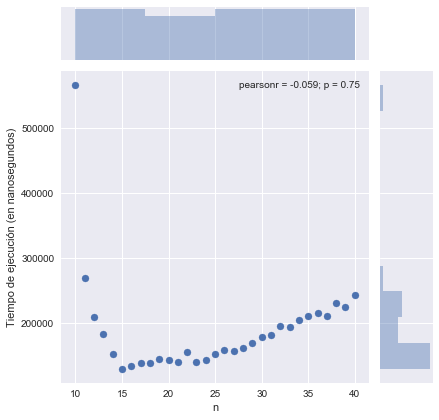

In [363]:
dfExactA = dfExact[dfExact.m == 40]

g = sns.jointplot(
    x=n, y=ns, data=dfExactA
)
g.set_axis_labels(xlabel=n, ylabel=tiempo)

nodos = range(15,42)
#complejidad = [(5000 * n + 50000) for n in nodos]
#g.ax_joint.plot(nodos, complejidad, linewidth=3, color=blue, zorder=3)
#complejidad = [(4000 * (2 ** n)) for n in nodos]
#g.ax_joint.plot(nodos, complejidad, linewidth=3, color=green, zorder=3)

plt.show()

# Implementación golosa

In [309]:
dfGreedy = pd.read_csv('greedy.csv')
dfGreedy = dfGreedy.groupby([n, m]).min().reset_index()

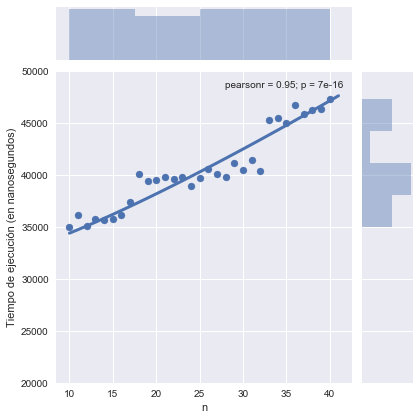

In [436]:
dfGreedyA = dfGreedy[(dfGreedy.n > 0) & (dfGreedy.m == 40)]

g = sns.jointplot(
    x=n, y=ns, data=dfGreedyA,
    ylim=(20000,50000)
)
g.set_axis_labels(xlabel=n, ylabel=tiempo)

nodos = range(10,42)
complejidad = [(100 * n * np.log(n) + 10 * n + 32000) for n in nodos]
g.ax_joint.plot(nodos, complejidad, linewidth=3, color=blue, zorder=3)
#complejidad = [(4000 * (2 ** n)) for n in nodos]
#g.ax_joint.plot(nodos, complejidad, linewidth=3, color=green, zorder=3)

plt.show()

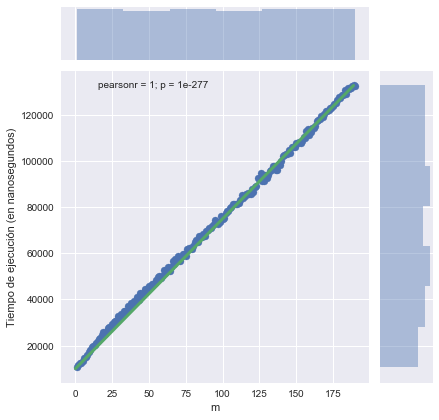

In [445]:
dfGreedyB = dfGreedy[(dfGreedy.n == 20) & (dfGreedy.m > 0)]

g = sns.jointplot(
    x=m, y=ns, data=dfGreedyB
)
g.set_axis_labels(xlabel=m, ylabel=tiempo)
nodos = range(0,190)
complejidad = [(650 * n + 10000) for n in nodos]
g.ax_joint.plot(nodos, complejidad, linewidth=3, color=green, zorder=3)

plt.show()

# Implementación local

In [347]:
dfLocal = pd.read_csv('local.csv')
dfLocal = dfLocal.groupby([n, m]).min().reset_index()
dfLocalNoGr = pd.read_csv('local-nogreedy.csv')
dfLocalNoGr = dfLocalNoGr.groupby([n, m]).min().reset_index()

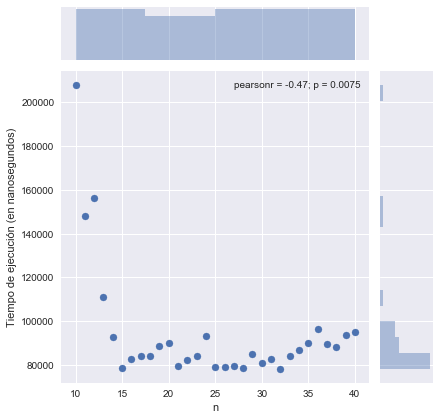

In [449]:
dfLocalA = dfLocal[(dfLocal.n > 0) & (dfLocal.m == 40)]

g = sns.jointplot(
    x=n, y=ns, data=dfLocalA
)
g.set_axis_labels(xlabel=n, ylabel=tiempo)

plt.show()

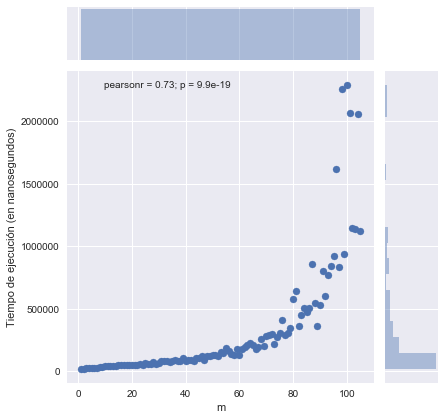

In [359]:
dfLocalB = dfLocal[(dfLocal.n == 15) & (dfLocal.m > 0)]

g = sns.jointplot(
    x=m, y=ns,
    data=dfLocalB
)
g.set_axis_labels(xlabel=m, ylabel=tiempo)

plt.show()

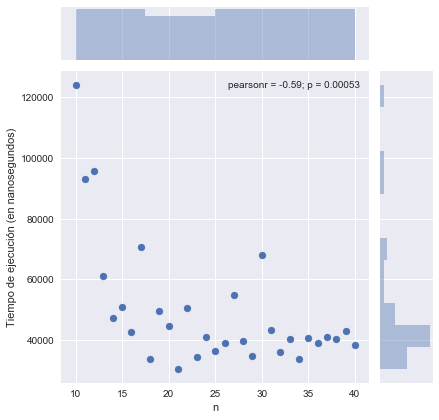

In [350]:
dfLocalNoGrA = dfLocalNoGr[(dfLocalNoGr.n > 0) & (dfLocalNoGr.m == 40)]

g = sns.jointplot(
    x=n, y=ns, data=dfLocalNoGrA
)
g.set_axis_labels(xlabel=n, ylabel=tiempo)

plt.show()

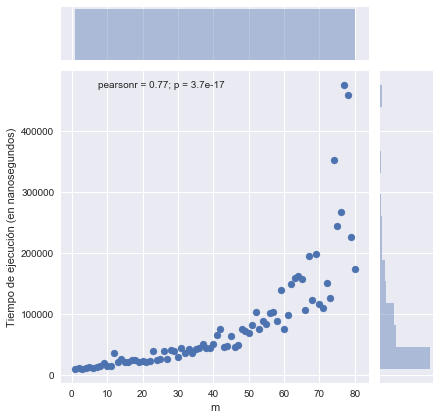

In [399]:
dfLocalNoGrB = dfLocalNoGr[(dfLocalNoGr.n == 15) & (dfLocalNoGr.m > 0)]

g = sns.jointplot(
    x=m, y=ns, data=dfLocalNoGrB
)
g.set_axis_labels(xlabel=m, ylabel=tiempo)


plt.show()

# Implementación GRASP

In [464]:
dfGraspIt = pd.read_csv('grasp-it.csv')
dfGraspIt = dfGraspIt.groupby([n, m, "p", "it"]).min().reset_index()
dfGraspP = pd.read_csv('grasp-p.csv')
dfGraspP = dfGraspP.groupby([n, m, "p", "it"]).min().reset_index()
dfGrasp = pd.read_csv('grasp.csv')
dfGrasp = dfGrasp.groupby([n, m, "p", "it"]).min().reset_index()

p = "p"
it = "it"
diff = "diff"

diferencias = "Diferencia vs respuesta exacta"
iters = "Iteraciones"
perc = "Porcentaje de nodos a considerar"

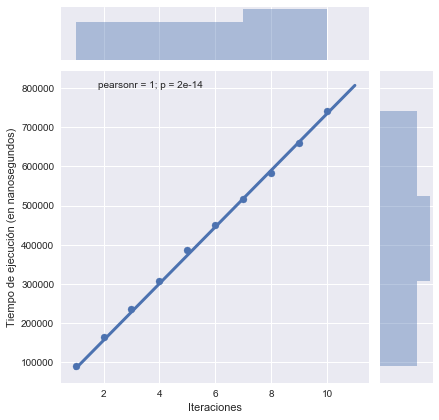

In [461]:
dfGraspA = dfGraspIt[(dfGraspIt.n == 10) & (dfGraspIt.m == 20)
                     & (dfGraspIt.p == 0.5) & (dfGraspIt.it > 0)]

g = sns.jointplot(
    x=it, y=ns, data=dfGraspA
)
g.set_axis_labels(xlabel=iters, ylabel=tiempo)
nodos = range(1,12)
complejidad = [(72500 * n + 10000) for n in nodos]
g.ax_joint.plot(nodos, complejidad, linewidth=3, color=blue, zorder=3)

plt.show()

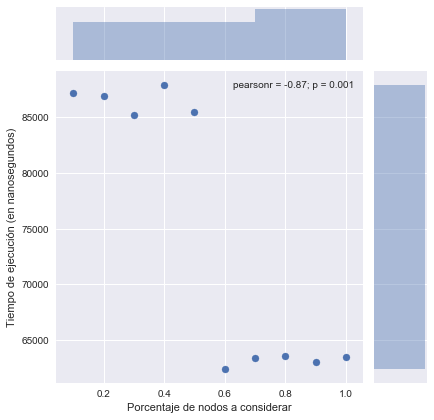

In [374]:
dfGraspB = dfGraspP[(dfGraspP.n == 10) & (dfGraspP.m == 20) & (dfGraspP.p > 0)]

g = sns.jointplot(
    x=p, y=ns, data=dfGraspB
)
g.set_axis_labels(xlabel=perc, ylabel=tiempo)

plt.show()

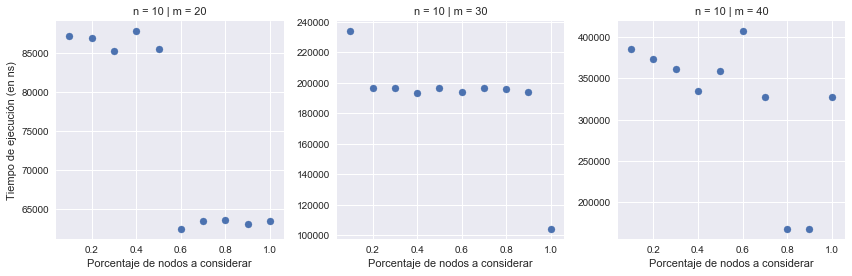

In [466]:
dfGraspC = dfGraspP[((dfGraspP.n == 10))
                    & ((dfGraspP.m == 20) | (dfGraspP.m == 30) | (dfGraspP.m == 40))
                    & (dfGraspP.p > 0)]

g = sns.FacetGrid(
    col=m,
    row=n,
    data=dfGraspC,
    sharey=False,
    size=4
)

g.map(plt.scatter, p, ns)
g.set_xlabels(perc)
g.set_ylabels("Tiempo de ejecución (en ns)")

plt.show()

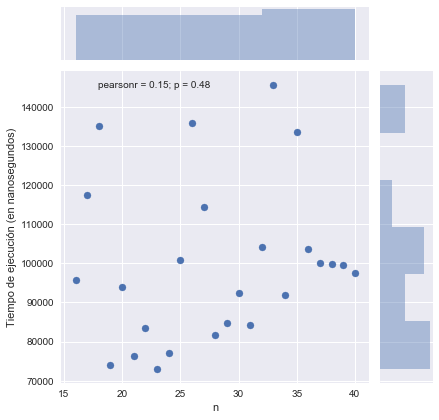

In [325]:
dfGraspD = dfGrasp[(dfGrasp.n > 15) & (dfGrasp.m == 40) & (dfGrasp.p == 0.5) & (dfGrasp.it == 1)]

g = sns.jointplot(
    x=n, y=ns, data=dfGraspD
)
g.set_axis_labels(xlabel=n, ylabel=tiempo)

plt.show()

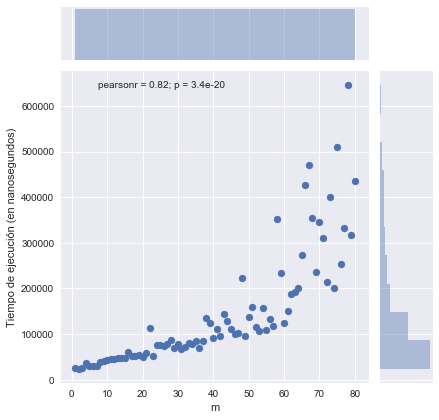

In [335]:
dfGraspE = dfGrasp[(dfGrasp.n == 15) & (dfGrasp.m > 0) & (dfGrasp.p == 0.5) & (dfGrasp.it == 1)]

g = sns.jointplot(
    x=m, y=ns, data=dfGraspE
)
g.set_axis_labels(xlabel=m, ylabel=tiempo)

plt.show()

# Fitteo de metaheuristica

In [379]:
dfFit = pd.read_csv('fit.csv')

diff = "diff"
difers = "Diferencia vs resultado exacto"

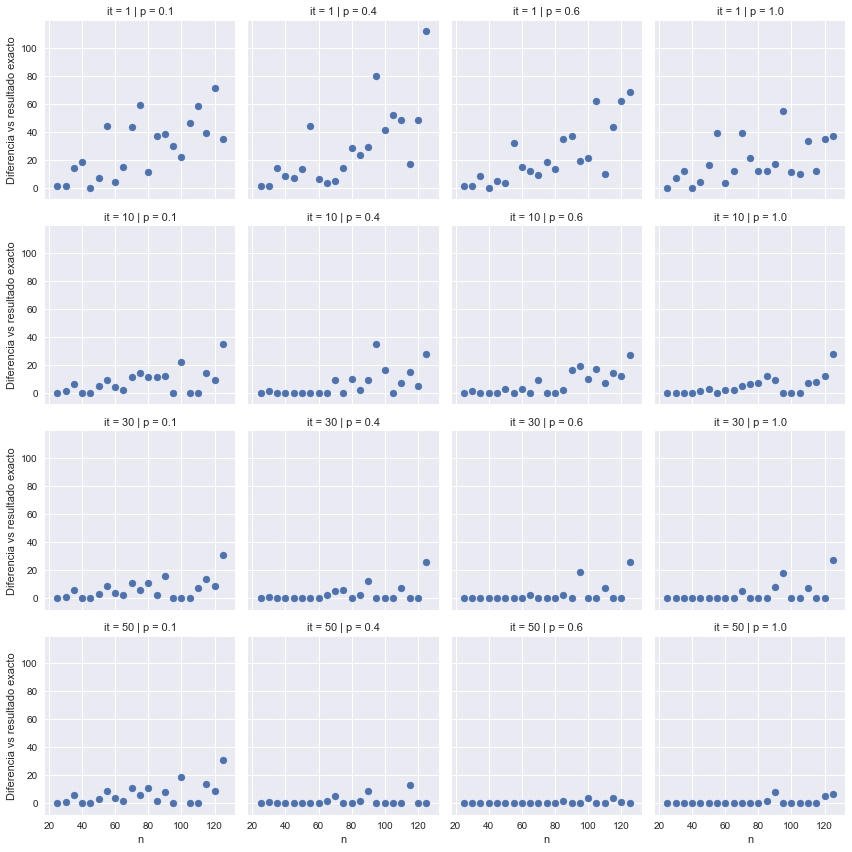

In [381]:
dfFitA = dfFit[((dfFit.p == 0.1) | (dfFit.p == 0.4) | (dfFit.p == 0.6) | (dfFit.p == 1))
              & ((dfFit.it == 1) | (dfFit.it == 10) | (dfFit.it == 30) | (dfFit.it == 50))]

plt.clf()
g = sns.FacetGrid(
    col=p,
    row=it,
    data=dfFitA
)

g.map(plt.scatter, n, "diff")
g.set_axis_labels(n, difers)

plt.show()

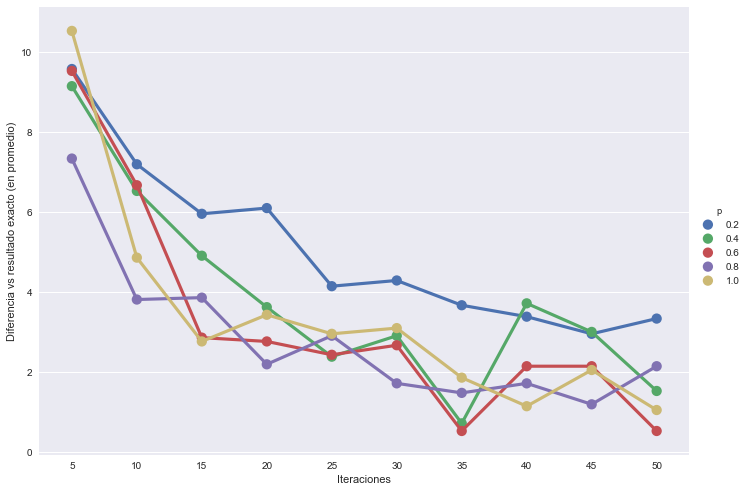

In [384]:
dfFitB = dfFit[
    ((dfFit.p == 0.2) | (dfFit.p == 0.4) | (dfFit.p == 0.6) | (dfFit.p == 0.8) | (dfFit.p == 1))
    & (dfFit.it % 5 == 0)]

g = sns.factorplot(
    x="it",
    y="diff",
    hue="p",
    data=dfFitB,
    size=7,
    aspect=1.4,
    ci=None
)
g.set(xlabel=iters, ylabel=difers + " (en promedio)")

plt.show()